In [6]:
import pandas as pd
import ast
import os
import math
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 경로 설정
base_path = '/content/drive/MyDrive/2024/TextMining'
data_path = os.path.join(base_path, 'reviews_data')
output_path = os.path.join(base_path, 'new')  # 결과 저장 폴더
os.makedirs(output_path, exist_ok=True)  # 폴더가 없으면 생성

app_names = ['다방', '직방', '피터팬','네이버부동산', '호갱노노']
files = [os.path.join(data_path, f"preprocessed4_reviews_data_{app}_별점.csv") for app in app_names]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#########다방
import pandas as pd
from collections import defaultdict
from IPython.display import display

# 1. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_다방_별점.csv'
df = pd.read_csv(data_path)

# content_pos 열에서 ('단어', '품사') 형식의 데이터를 읽어오기
content_pos = df['content_pos'].dropna()

# 2. KNU 한국어 감정 사전 로드
def load_knu_sentiment_dict():
    sentiment_dict = defaultdict(int)  # 기본값 0
    with open('/content/drive/MyDrive/2024/TextMining/SentiWord_Dict.txt', 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # 줄 끝의 공백 및 개행 문자 제거
            if '\t' in line:  # 탭이 있는 경우에만 처리
                word, score = line.split("\t")
                sentiment_dict[word] = int(score)  # 단어와 점수 저장
            elif ' ' in line:  # 공백이 있는 경우 (공백 구분자로 변경)
                word, score = line.split(" ")
                sentiment_dict[word] = int(score)
            else:
                print(f"경고: 구분자가 없는 라인 발견 - {line}")  # 구분자가 없는 경우 경고 출력
    return sentiment_dict

# 감정 사전 로드
knu_sentiment = load_knu_sentiment_dict()

# 3. 형용사 및 기타 감정 단어 추출 함수 정의
def extract_emotion_words(pos_list):
    emotion_words = {'Adjective': [], 'Adverb': [], 'Noun': []}  # 형용사, 부사, 명사 분리
    for item in pos_list:  # 튜플 형식으로 (단어, 품사)가 존재
        word, pos = item  # ('단어', '품사') 튜플로 분리
        if pos in ["Adjective", "Adverb", "Noun"]:  # 감정이 강한 단어는 명사, 형용사, 부사로 고려
            emotion_words[pos].append(word)
    return emotion_words

# 4. 데이터에서 감정 단어 추출 및 감정 점수 매핑
def calculate_sentiment_score(emotion_words, sentiment_dict):
    score = 0
    # 형용사, 부사, 명사에서 감정 점수 합산
    for pos in ['Adjective', 'Adverb', 'Noun']:
        for word in emotion_words[pos]:
            score += sentiment_dict.get(word, 0)  # 사전에 없으면 0점
    return score

# 5. 데이터프레임에 형용사 및 감정 단어 추출
df['EmotionWords'] = content_pos.apply(eval).apply(extract_emotion_words)  # 감정 단어 추출
df['SentimentScore'] = df['EmotionWords'].apply(lambda x: calculate_sentiment_score(x, knu_sentiment))

# 6. 사용자 만족도 점수화
average_sentiment_score = df['SentimentScore'].mean()
print(f"사용자 평균 만족도 점수: {average_sentiment_score}")

# 7. 만족도 점수에 따라 긍정/부정 태그 추가
df['SentimentTag'] = df['SentimentScore'].apply(lambda x: "긍정" if x > 0 else "부정" if x < 0 else "중립")

# 8. 'EmotionWords' 열에서 형용사만 추출하여 간단히 표시하기
df['EmotionWords_Simplified'] = df['EmotionWords'].apply(lambda x: ', '.join(x['Adjective']) if 'Adjective' in x else '')

# # 9. 결과를 깔끔하게 출력할 수 있도록 선택된 열만 표시
# result_df = df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']]

# # 10. IPython display로 깔끔하게 출력
# display(result_df.head())  # 처음 5개의 결과를 표시

# 전체 결과를 출력할 때
display(df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']])  # 전체 데이터프레임을 표시


사용자 평균 만족도 점수: 0.5670961347869178


,EmotionWords_Simplified,SentimentScore,SentimentTag
0,"아니, 이상한, 짜증나게, 답답하네",0,중립
1,"입니다, 정직하게, 없고, 입니다, 같아, 궁금해서",-2,부정
2,"어떻게, 어떻게",0,중립
3,"유명한, 아님",1,긍정
4,짜증나게,-2,부정
...,...,...,...
25220,,0,중립
25221,"원하는, 있어서, 좋네요",0,중립
25222,추함,1,긍정
25223,괜찮네,0,중립


In [8]:
#########직방
import pandas as pd
from collections import defaultdict
from IPython.display import display

# 1. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_직방_별점.csv'
df = pd.read_csv(data_path)

# content_pos 열에서 ('단어', '품사') 형식의 데이터를 읽어오기
content_pos = df['content_pos'].dropna()

# 2. KNU 한국어 감정 사전 로드
def load_knu_sentiment_dict():
    sentiment_dict = defaultdict(int)  # 기본값 0
    with open('/content/drive/MyDrive/2024/TextMining/SentiWord_Dict.txt', 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # 줄 끝의 공백 및 개행 문자 제거
            if '\t' in line:  # 탭이 있는 경우에만 처리
                word, score = line.split("\t")
                sentiment_dict[word] = int(score)  # 단어와 점수 저장
            elif ' ' in line:  # 공백이 있는 경우 (공백 구분자로 변경)
                word, score = line.split(" ")
                sentiment_dict[word] = int(score)
            else:
                print(f"경고: 구분자가 없는 라인 발견 - {line}")  # 구분자가 없는 경우 경고 출력
    return sentiment_dict

# 감정 사전 로드
knu_sentiment = load_knu_sentiment_dict()

# 3. 형용사 및 기타 감정 단어 추출 함수 정의
def extract_emotion_words(pos_list):
    emotion_words = {'Adjective': [], 'Adverb': [], 'Noun': []}  # 형용사, 부사, 명사 분리
    for item in pos_list:  # 튜플 형식으로 (단어, 품사)가 존재
        word, pos = item  # ('단어', '품사') 튜플로 분리
        if pos in ["Adjective", "Adverb", "Noun"]:  # 감정이 강한 단어는 명사, 형용사, 부사로 고려
            emotion_words[pos].append(word)
    return emotion_words

# 4. 데이터에서 감정 단어 추출 및 감정 점수 매핑
def calculate_sentiment_score(emotion_words, sentiment_dict):
    score = 0
    # 형용사, 부사, 명사에서 감정 점수 합산
    for pos in ['Adjective', 'Adverb', 'Noun']:
        for word in emotion_words[pos]:
            score += sentiment_dict.get(word, 0)  # 사전에 없으면 0점
    return score

# 5. 데이터프레임에 형용사 및 감정 단어 추출
df['EmotionWords'] = content_pos.apply(eval).apply(extract_emotion_words)  # 감정 단어 추출
df['SentimentScore'] = df['EmotionWords'].apply(lambda x: calculate_sentiment_score(x, knu_sentiment))

# 6. 사용자 만족도 점수화
average_sentiment_score = df['SentimentScore'].mean()
print(f"사용자 평균 만족도 점수: {average_sentiment_score}")

# 7. 만족도 점수에 따라 긍정/부정 태그 추가
df['SentimentTag'] = df['SentimentScore'].apply(lambda x: "긍정" if x > 0 else "부정" if x < 0 else "중립")

# 8. 'EmotionWords' 열에서 형용사만 추출하여 간단히 표시하기
df['EmotionWords_Simplified'] = df['EmotionWords'].apply(lambda x: ', '.join(x['Adjective']) if 'Adjective' in x else '')

# # 9. 결과를 깔끔하게 출력할 수 있도록 선택된 열만 표시
# result_df = df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']]

# # 10. IPython display로 깔끔하게 출력
# display(result_df.head())  # 처음 5개의 결과를 표시

# 전체 결과를 출력할 때
display(df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']])  # 전체 데이터프레임을 표시


사용자 평균 만족도 점수: 0.4075023444826508


,EmotionWords_Simplified,SentimentScore,SentimentTag
0,아니,0,중립
1,"우둔한, 없고, 이런, 없긴, 없었나, 성공한, 미안할, 낮음, 있어요, 있게, 아...",2,긍정
2,"없으면서, 좋을",1,긍정
3,"좋은데, 있는, 있었으면, 좋겠어요, 없는, 불편해요, 있었으면, 좋겠어요, 힘듭니...",0,중립
4,"어떠셨나요, 적당히",0,중립
...,...,...,...
31985,"있어서, 좋아요",0,중립
31986,"많고, 편하네요, 있어서, 있네요, 추합니다",0,중립
31987,"필요한, 편함, 입니다",0,중립
31988,"없네, 많지만",0,중립


In [9]:
#########피터팬
import pandas as pd
from collections import defaultdict
from IPython.display import display

# 1. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_피터팬_별점.csv'
df = pd.read_csv(data_path)

# content_pos 열에서 ('단어', '품사') 형식의 데이터를 읽어오기
content_pos = df['content_pos'].dropna()

# 2. KNU 한국어 감정 사전 로드
def load_knu_sentiment_dict():
    sentiment_dict = defaultdict(int)  # 기본값 0
    with open('/content/drive/MyDrive/2024/TextMining//SentiWord_Dict.txt', 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # 줄 끝의 공백 및 개행 문자 제거
            if '\t' in line:  # 탭이 있는 경우에만 처리
                word, score = line.split("\t")
                sentiment_dict[word] = int(score)  # 단어와 점수 저장
            elif ' ' in line:  # 공백이 있는 경우 (공백 구분자로 변경)
                word, score = line.split(" ")
                sentiment_dict[word] = int(score)
            else:
                print(f"경고: 구분자가 없는 라인 발견 - {line}")  # 구분자가 없는 경우 경고 출력
    return sentiment_dict

# 감정 사전 로드
knu_sentiment = load_knu_sentiment_dict()

# 3. 형용사 및 기타 감정 단어 추출 함수 정의
def extract_emotion_words(pos_list):
    emotion_words = {'Adjective': [], 'Adverb': [], 'Noun': []}  # 형용사, 부사, 명사 분리
    for item in pos_list:  # 튜플 형식으로 (단어, 품사)가 존재
        word, pos = item  # ('단어', '품사') 튜플로 분리
        if pos in ["Adjective", "Adverb", "Noun"]:  # 감정이 강한 단어는 명사, 형용사, 부사로 고려
            emotion_words[pos].append(word)
    return emotion_words

# 4. 데이터에서 감정 단어 추출 및 감정 점수 매핑
def calculate_sentiment_score(emotion_words, sentiment_dict):
    score = 0
    # 형용사, 부사, 명사에서 감정 점수 합산
    for pos in ['Adjective', 'Adverb', 'Noun']:
        for word in emotion_words[pos]:
            score += sentiment_dict.get(word, 0)  # 사전에 없으면 0점
    return score

# 5. 데이터프레임에 형용사 및 감정 단어 추출
df['EmotionWords'] = content_pos.apply(eval).apply(extract_emotion_words)  # 감정 단어 추출
df['SentimentScore'] = df['EmotionWords'].apply(lambda x: calculate_sentiment_score(x, knu_sentiment))

# 6. 사용자 만족도 점수화
average_sentiment_score = df['SentimentScore'].mean()
print(f"사용자 평균 만족도 점수: {average_sentiment_score}")

# 7. 만족도 점수에 따라 긍정/부정 태그 추가
df['SentimentTag'] = df['SentimentScore'].apply(lambda x: "긍정" if x > 0 else "부정" if x < 0 else "중립")

# 8. 'EmotionWords' 열에서 형용사만 추출하여 간단히 표시하기
df['EmotionWords_Simplified'] = df['EmotionWords'].apply(lambda x: ', '.join(x['Adjective']) if 'Adjective' in x else '')

# # 9. 결과를 깔끔하게 출력할 수 있도록 선택된 열만 표시
# result_df = df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']]

# # 10. IPython display로 깔끔하게 출력
# display(result_df.head())  # 처음 5개의 결과를 표시

# 전체 결과를 출력할 때
display(df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']])  # 전체 데이터프레임을 표시


사용자 평균 만족도 점수: 0.45809513536835295


,EmotionWords_Simplified,SentimentScore,SentimentTag
0,같음,0,중립
1,"완전히, 더러운",-2,부정
2,"어떤, 어떤, 어떤, 이상함, 궁금한, 작은, 있는, 없는, 있고, 어떤, 있는데",0,중립
3,없음,-4,부정
4,"복잡한데, 원하는, 있으니, 편하네용",0,중립
...,...,...,...
9266,현명하게,3,긍정
9267,"빠르게, 같은, 없어서, 좋네요",-1,부정
9268,"편리하고, 안전하고, 좋네요, 좋은, 많은",4,긍정
9269,"유용한, 좋은, 편하게",7,긍정


In [10]:
#########호갱노노
import pandas as pd
from collections import defaultdict
from IPython.display import display

# 1. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_호갱노노_별점.csv'
df = pd.read_csv(data_path)

# content_pos 열에서 ('단어', '품사') 형식의 데이터를 읽어오기
content_pos = df['content_pos'].dropna()

# 2. KNU 한국어 감정 사전 로드
def load_knu_sentiment_dict():
    sentiment_dict = defaultdict(int)  # 기본값 0
    with open('/content/drive/MyDrive/2024/TextMining/SentiWord_Dict.txt', 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # 줄 끝의 공백 및 개행 문자 제거
            if '\t' in line:  # 탭이 있는 경우에만 처리
                word, score = line.split("\t")
                sentiment_dict[word] = int(score)  # 단어와 점수 저장
            elif ' ' in line:  # 공백이 있는 경우 (공백 구분자로 변경)
                word, score = line.split(" ")
                sentiment_dict[word] = int(score)
            else:
                print(f"경고: 구분자가 없는 라인 발견 - {line}")  # 구분자가 없는 경우 경고 출력
    return sentiment_dict

# 감정 사전 로드
knu_sentiment = load_knu_sentiment_dict()

# 3. 형용사 및 기타 감정 단어 추출 함수 정의
def extract_emotion_words(pos_list):
    emotion_words = {'Adjective': [], 'Adverb': [], 'Noun': []}  # 형용사, 부사, 명사 분리
    for item in pos_list:  # 튜플 형식으로 (단어, 품사)가 존재
        word, pos = item  # ('단어', '품사') 튜플로 분리
        if pos in ["Adjective", "Adverb", "Noun"]:  # 감정이 강한 단어는 명사, 형용사, 부사로 고려
            emotion_words[pos].append(word)
    return emotion_words

# 4. 데이터에서 감정 단어 추출 및 감정 점수 매핑
def calculate_sentiment_score(emotion_words, sentiment_dict):
    score = 0
    # 형용사, 부사, 명사에서 감정 점수 합산
    for pos in ['Adjective', 'Adverb', 'Noun']:
        for word in emotion_words[pos]:
            score += sentiment_dict.get(word, 0)  # 사전에 없으면 0점
    return score

# 5. 데이터프레임에 형용사 및 감정 단어 추출
df['EmotionWords'] = content_pos.apply(eval).apply(extract_emotion_words)  # 감정 단어 추출
df['SentimentScore'] = df['EmotionWords'].apply(lambda x: calculate_sentiment_score(x, knu_sentiment))

# 6. 사용자 만족도 점수화
average_sentiment_score = df['SentimentScore'].mean()
print(f"사용자 평균 만족도 점수: {average_sentiment_score}")

# 7. 만족도 점수에 따라 긍정/부정 태그 추가
df['SentimentTag'] = df['SentimentScore'].apply(lambda x: "긍정" if x > 0 else "부정" if x < 0 else "중립")

# 8. 'EmotionWords' 열에서 형용사만 추출하여 간단히 표시하기
df['EmotionWords_Simplified'] = df['EmotionWords'].apply(lambda x: ', '.join(x['Adjective']) if 'Adjective' in x else '')

# # 9. 결과를 깔끔하게 출력할 수 있도록 선택된 열만 표시
# result_df = df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']]

# # 10. IPython display로 깔끔하게 출력
# display(result_df.head())  # 처음 5개의 결과를 표시

# 전체 결과를 출력할 때
display(df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']])  # 전체 데이터프레임을 표시


사용자 평균 만족도 점수: 0.2083696599825632


,EmotionWords_Simplified,SentimentScore,SentimentTag
0,"아니고, 아닌, 같아, 굉장히, 짜증납니다",1,긍정
1,"있는데도, 피곤하게, 아니고",0,중립
2,"좋았던, 편하게, 있던, 자세히",4,긍정
3,"있네요, 없고, 있는, 퇴보하네",-1,부정
4,"아니라, 특정한, 그래, 그런, 있다, 아니라는, 아닌, 동일한, 편할, 같아",-2,부정
...,...,...,...
2289,편합니다,0,중립
2290,,0,중립
2291,좋,0,중립
2292,굳,0,중립


In [11]:
#########네이버부동산
import pandas as pd
from collections import defaultdict
from IPython.display import display

# 1. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_네이버부동산_별점.csv'
df = pd.read_csv(data_path)

# content_pos 열에서 ('단어', '품사') 형식의 데이터를 읽어오기
content_pos = df['content_pos'].dropna()

# 2. KNU 한국어 감정 사전 로드
def load_knu_sentiment_dict():
    sentiment_dict = defaultdict(int)  # 기본값 0
    with open('/content/drive/MyDrive/2024/TextMining/SentiWord_Dict.txt', 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # 줄 끝의 공백 및 개행 문자 제거
            if '\t' in line:  # 탭이 있는 경우에만 처리
                word, score = line.split("\t")
                sentiment_dict[word] = int(score)  # 단어와 점수 저장
            elif ' ' in line:  # 공백이 있는 경우 (공백 구분자로 변경)
                word, score = line.split(" ")
                sentiment_dict[word] = int(score)
            else:
                print(f"경고: 구분자가 없는 라인 발견 - {line}")  # 구분자가 없는 경우 경고 출력
    return sentiment_dict

# 감정 사전 로드
knu_sentiment = load_knu_sentiment_dict()

# 3. 형용사 및 기타 감정 단어 추출 함수 정의
def extract_emotion_words(pos_list):
    emotion_words = {'Adjective': [], 'Adverb': [], 'Noun': []}  # 형용사, 부사, 명사 분리
    for item in pos_list:  # 튜플 형식으로 (단어, 품사)가 존재
        word, pos = item  # ('단어', '품사') 튜플로 분리
        if pos in ["Adjective", "Adverb", "Noun"]:  # 감정이 강한 단어는 명사, 형용사, 부사로 고려
            emotion_words[pos].append(word)
    return emotion_words

# 4. 데이터에서 감정 단어 추출 및 감정 점수 매핑
def calculate_sentiment_score(emotion_words, sentiment_dict):
    score = 0
    # 형용사, 부사, 명사에서 감정 점수 합산
    for pos in ['Adjective', 'Adverb', 'Noun']:
        for word in emotion_words[pos]:
            score += sentiment_dict.get(word, 0)  # 사전에 없으면 0점
    return score

# 5. 데이터프레임에 형용사 및 감정 단어 추출
df['EmotionWords'] = content_pos.apply(eval).apply(extract_emotion_words)  # 감정 단어 추출
df['SentimentScore'] = df['EmotionWords'].apply(lambda x: calculate_sentiment_score(x, knu_sentiment))

# 6. 사용자 만족도 점수화
average_sentiment_score = df['SentimentScore'].mean()
print(f"사용자 평균 만족도 점수: {average_sentiment_score}")

# 7. 만족도 점수에 따라 긍정/부정 태그 추가
df['SentimentTag'] = df['SentimentScore'].apply(lambda x: "긍정" if x > 0 else "부정" if x < 0 else "중립")

# 8. 'EmotionWords' 열에서 형용사만 추출하여 간단히 표시하기
df['EmotionWords_Simplified'] = df['EmotionWords'].apply(lambda x: ', '.join(x['Adjective']) if 'Adjective' in x else '')

# # 9. 결과를 깔끔하게 출력할 수 있도록 선택된 열만 표시
# result_df = df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']]

# # 10. IPython display로 깔끔하게 출력
# display(result_df.head())  # 처음 5개의 결과를 표시

# 전체 결과를 출력할 때
display(df[['EmotionWords_Simplified', 'SentimentScore', 'SentimentTag']])  # 전체 데이터프레임을 표시


사용자 평균 만족도 점수: -0.2889352818371608


,EmotionWords_Simplified,SentimentScore,SentimentTag
0,"그렇고, 있는, 같음, 아닌가",0,중립
1,"불편합니다, 같은, 있으니, 있어서, 불편합니다, 있으니, 있어서, 있습니다, 많은...",2,긍정
2,"아니라, 불편하고, 불편해진, 없다, 빠른",-1,부정
3,"불편해요, 아니고, 번거롭, 있더라, 있음, 좋겠어요",0,중립
4,"있고, 있고, 없고",0,중립
...,...,...,...
2390,,0,중립
2391,좋네,0,중립
2392,,0,중립
2393,,0,중립


In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!fc-list | grep Nanum
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (32.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
from google.colab import drive
import ast
import warnings
import math

In [23]:
# 한글 폰트 설정 - 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
try:
    font_prop = fm.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = True
except Exception:
    print("Warning: Font 'NanumSquare' not found. Using default font.")
    rc('font', family='sans-serif')
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = False

import logging
# 경고 및 로그 메시지 억제
warnings.filterwarnings("ignore")  # 일반 경고 억제
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)  # 폰트 경고 억제
plt.rcParams.update({'axes.unicode_minus': False})  # matplotlib의 마이너스 깨짐 방지


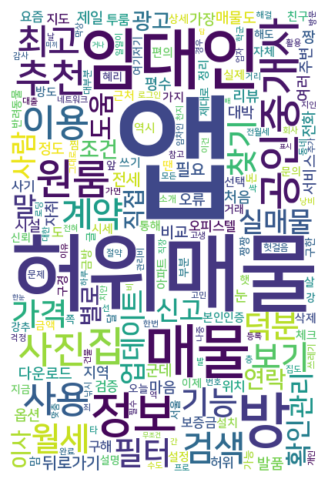

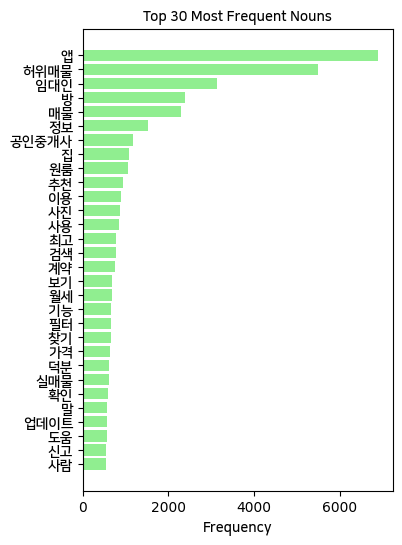

In [80]:
#########다방#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=400,
    height=600,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(4, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(4, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency', fontproperties=font_prop)
plt.title('Top 30 Most Frequent Nouns', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


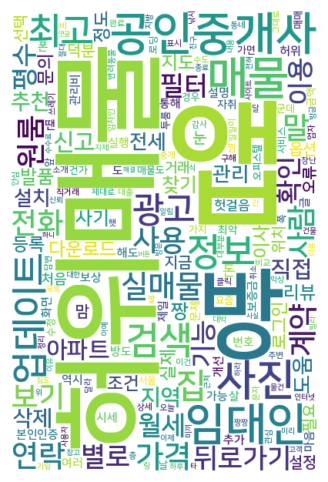

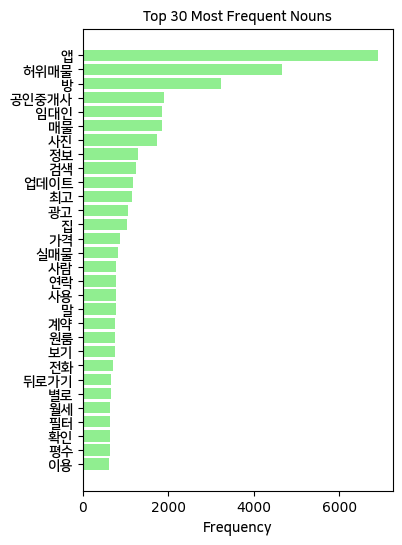

In [81]:
#########직방#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=400,
    height=600,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(4, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(4, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency', fontproperties=font_prop)
plt.title('Top 30 Most Frequent Nouns', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


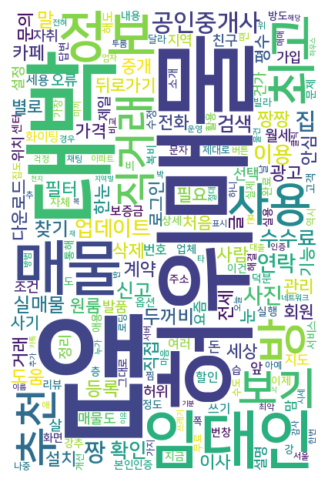

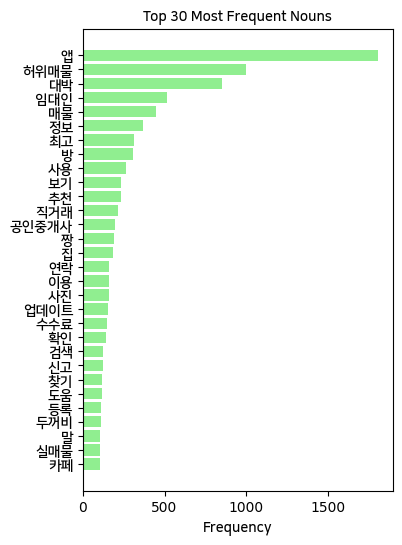

In [82]:
#########피터팬#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=400,
    height=600,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(4, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(4, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency', fontproperties=font_prop)
plt.title('Top 30 Most Frequent Nouns', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


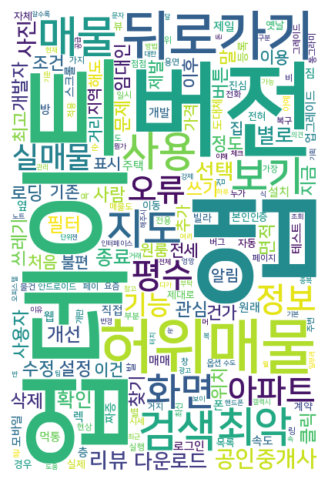

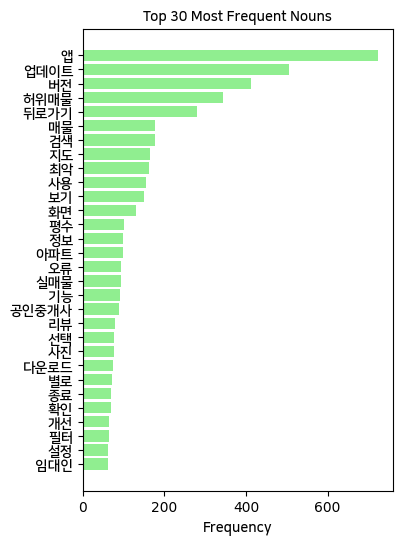

In [83]:
#########네이버부동산#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=400,
    height=600,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(4, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(4, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency', fontproperties=font_prop)
plt.title('Top 30 Most Frequent Nouns', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


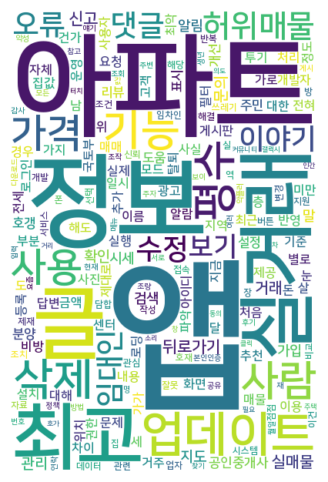

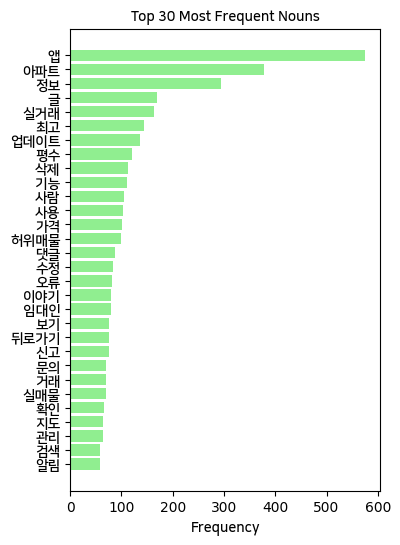

In [84]:
#########호갱노노#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=400,
    height=600,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(4, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(4, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency', fontproperties=font_prop)
plt.title('Top 30 Most Frequent Nouns', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()




---





---



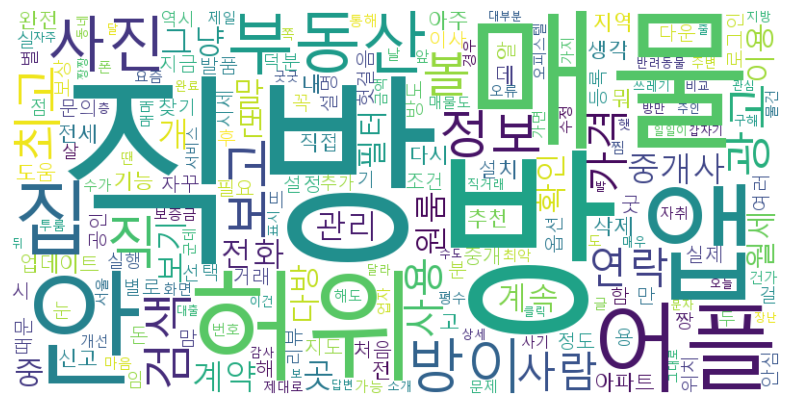

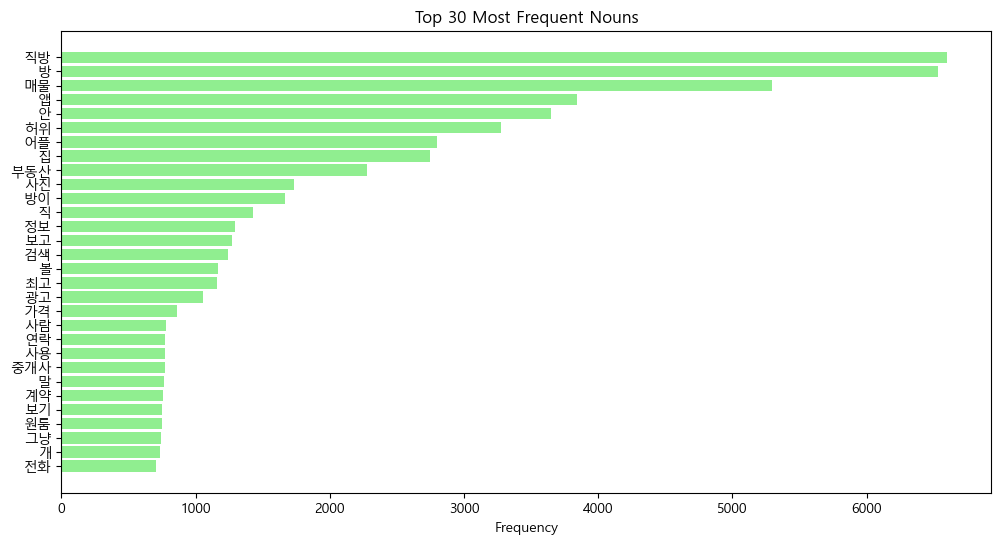

In [ ]:
#########직방#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로

# 1. Matplotlib에서 한글 폰트 설정
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 2. 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_직방_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Nouns')
plt.show()


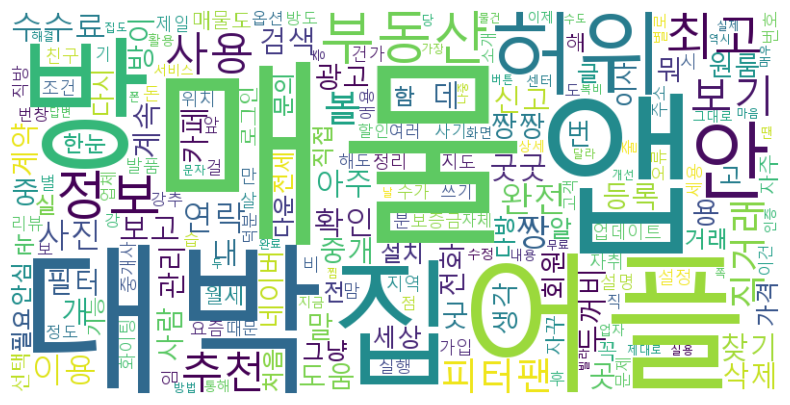

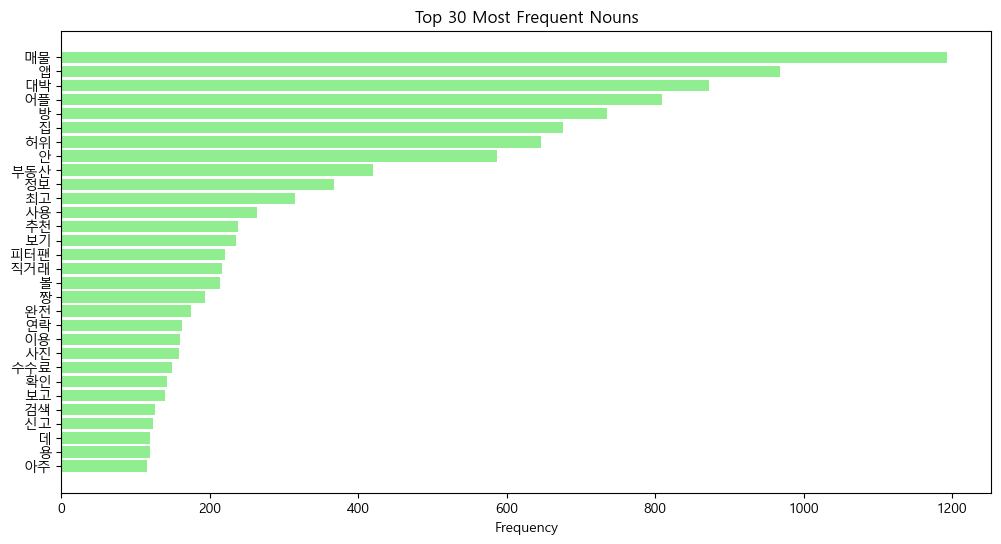

In [ ]:
#########피터팬#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로

# 1. Matplotlib에서 한글 폰트 설정
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 2. 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_피터팬_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Nouns')
plt.show()


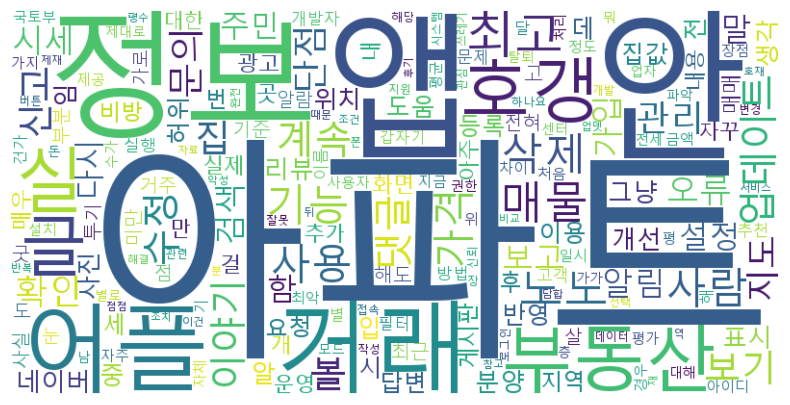

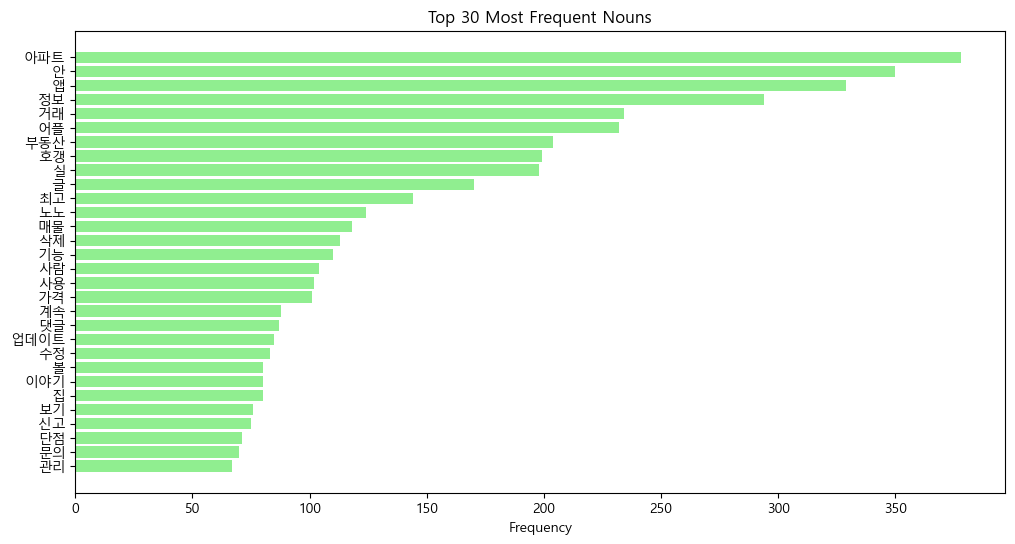

In [ ]:
#########호갱노노#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로

# 1. Matplotlib에서 한글 폰트 설정
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 2. 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_호갱노노_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Nouns')
plt.show()


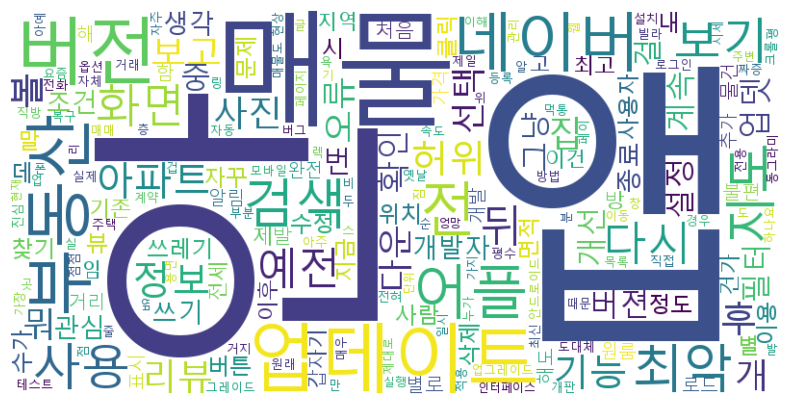

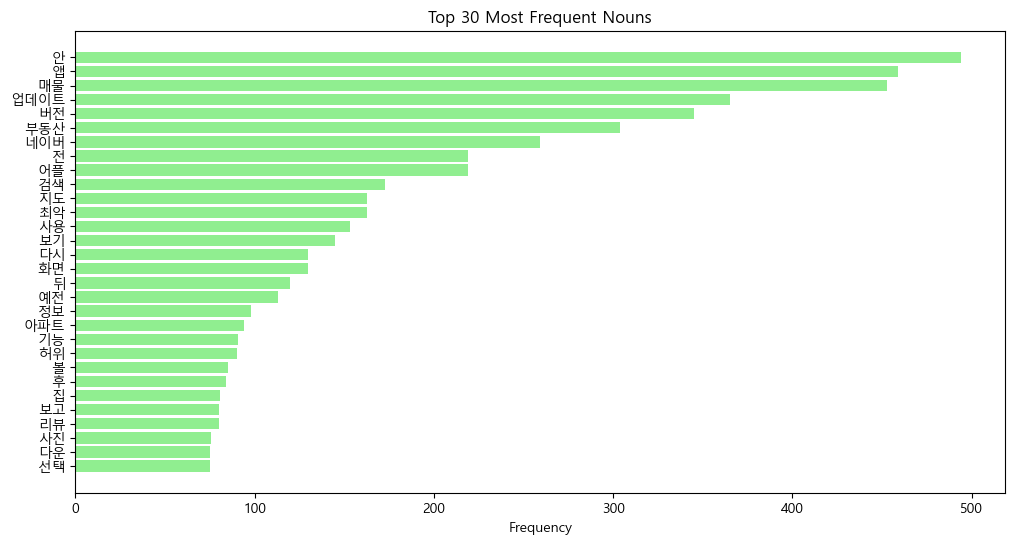

In [ ]:
#########네이버부동산#########
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로

# 1. Matplotlib에서 한글 폰트 설정
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 2. 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_네이버부동산_별점.csv'
df = pd.read_csv(data_path)

# 3. `nouns_without_stopwords` 열에서 명사 추출
all_nouns = df['nouns_without_stopwords'].dropna().tolist()

# 리스트가 문자열로 되어 있으면, 리스트로 변환
all_nouns = [noun for sublist in all_nouns for noun in eval(sublist)]

# 4. 명사 빈도수 계산
noun_counts = Counter(all_nouns)

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(noun_counts)

# 6. 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 끄기
plt.show()

# 7. 상위 30개 명사 시각화
top_30_nouns = noun_counts.most_common(30)

# 명사와 빈도 추출
top_nouns, top_frequencies = zip(*top_30_nouns)

# 상위 30개 명사 시각화
plt.figure(figsize=(12, 6))
plt.barh(top_nouns[::-1], top_frequencies[::-1], color='lightgreen')  # 내림차순 정렬하여 출력
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Nouns')
plt.show()


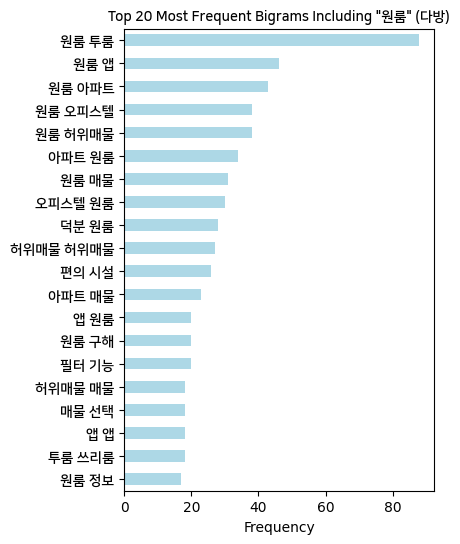

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('원룸', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 20개 투그램 시각화
top_20_bigrams = bigram_sums.head(20)
plt.figure(figsize=(4, 6))
top_20_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams Including "원룸" (다방)', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


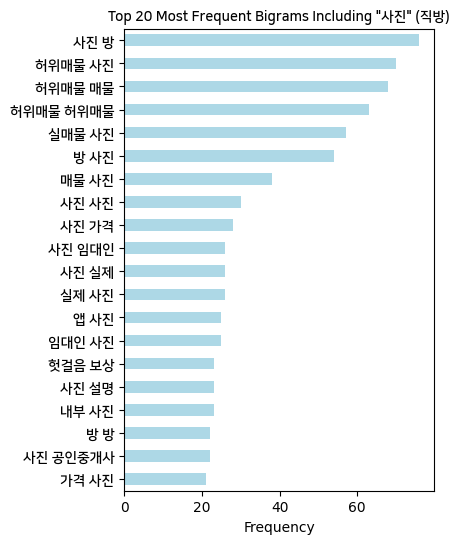

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('사진', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 20개 투그램 시각화
top_20_bigrams = bigram_sums.head(20)
plt.figure(figsize=(4, 6))
top_20_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams Including "사진" (직방)', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


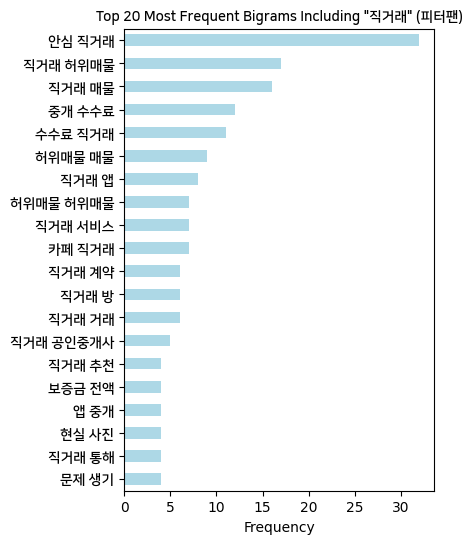

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('직거래', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 20개 투그램 시각화
top_20_bigrams = bigram_sums.head(20)
plt.figure(figsize=(4, 6))
top_20_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams Including "직거래" (피터팬)', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


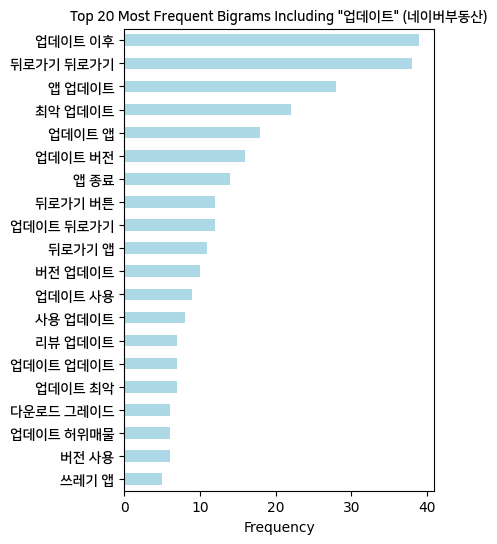

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('업데이트', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 20개 투그램 시각화
top_20_bigrams = bigram_sums.head(20)
plt.figure(figsize=(4, 6))
top_20_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams Including "업데이트" (네이버부동산)', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


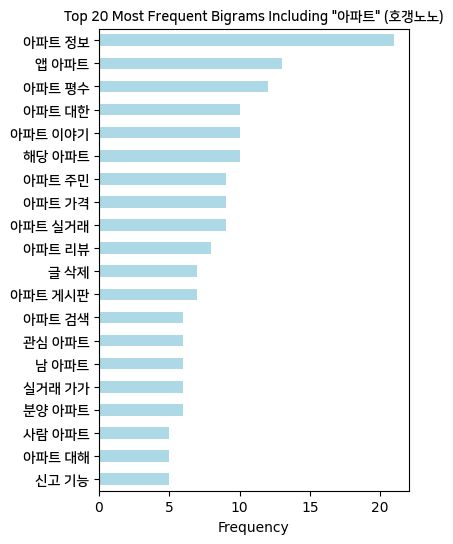

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('아파트', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 20개 투그램 시각화
top_20_bigrams = bigram_sums.head(20)
plt.figure(figsize=(4, 6))
top_20_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams Including "아파트" (호갱노노)', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


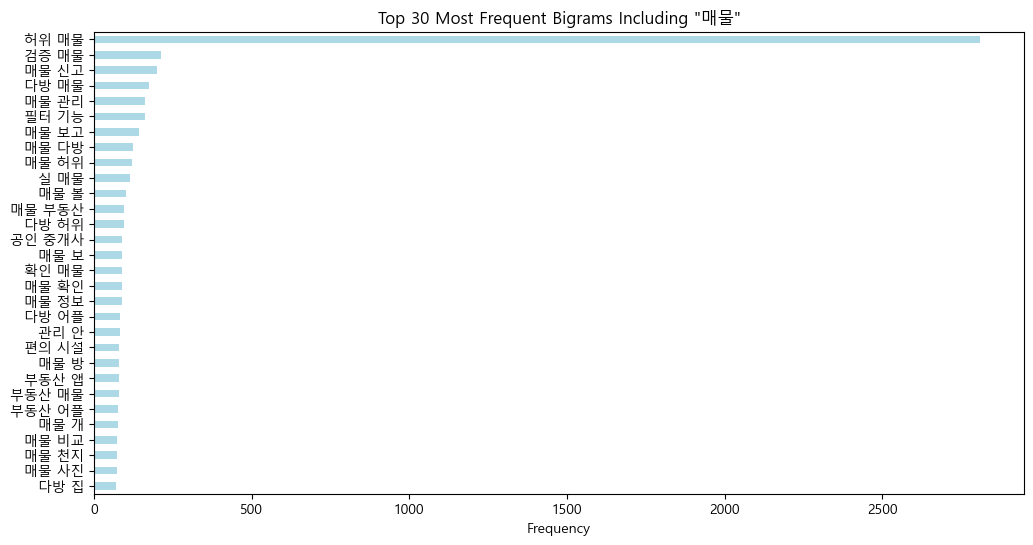

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
data_path = '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv'
df = pd.read_csv(data_path)


# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('매물', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 30개 투그램 시각화
top_30_bigrams = bigram_sums.head(30)
plt.figure(figsize=(8, 7))
top_30_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams Including "매물"', fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


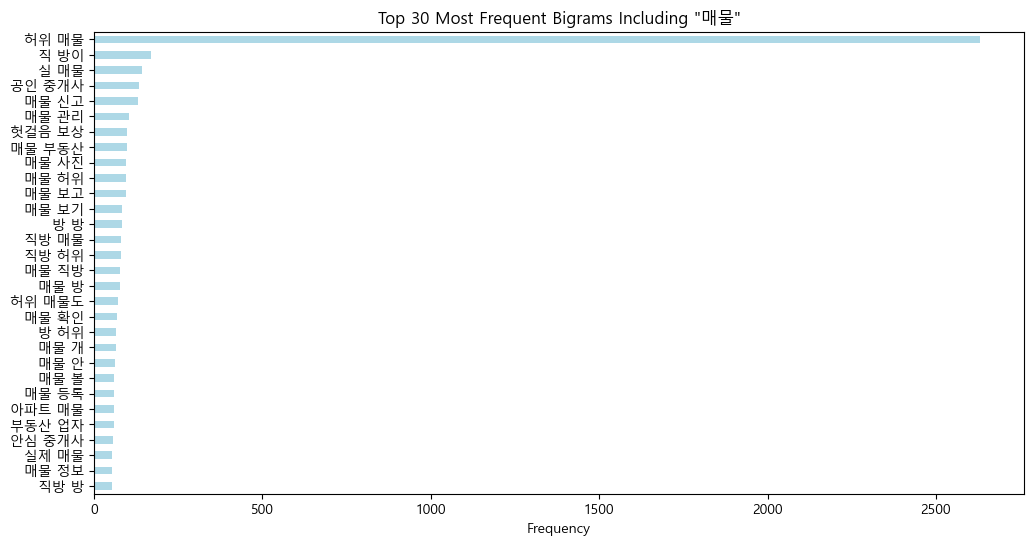

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_직방_별점.csv'
df = pd.read_csv(data_path)

# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('매물', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 30개 투그램 시각화
top_30_bigrams = bigram_sums.head(30)
plt.figure(figsize=(12, 6))
top_30_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams Including "매물"')
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


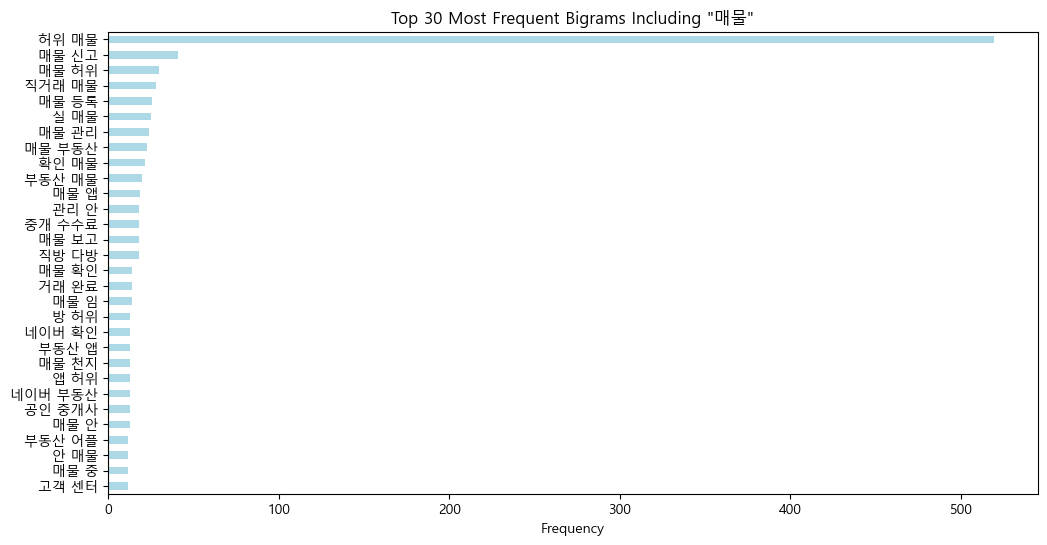

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_피터팬_별점.csv'
df = pd.read_csv(data_path)

# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('매물', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 30개 투그램 시각화
top_30_bigrams = bigram_sums.head(30)
plt.figure(figsize=(12, 6))
top_30_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams Including "매물"')
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


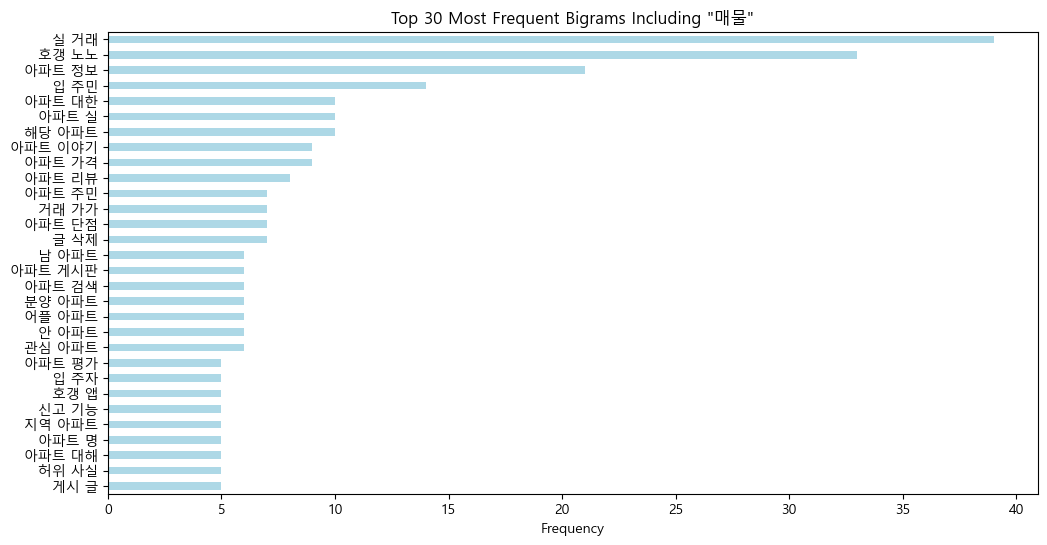

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_호갱노노_별점.csv'
df = pd.read_csv(data_path)

# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('아파트', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 30개 투그램 시각화
top_30_bigrams = bigram_sums.head(30)
plt.figure(figsize=(12, 6))
top_30_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams Including "매물"')
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


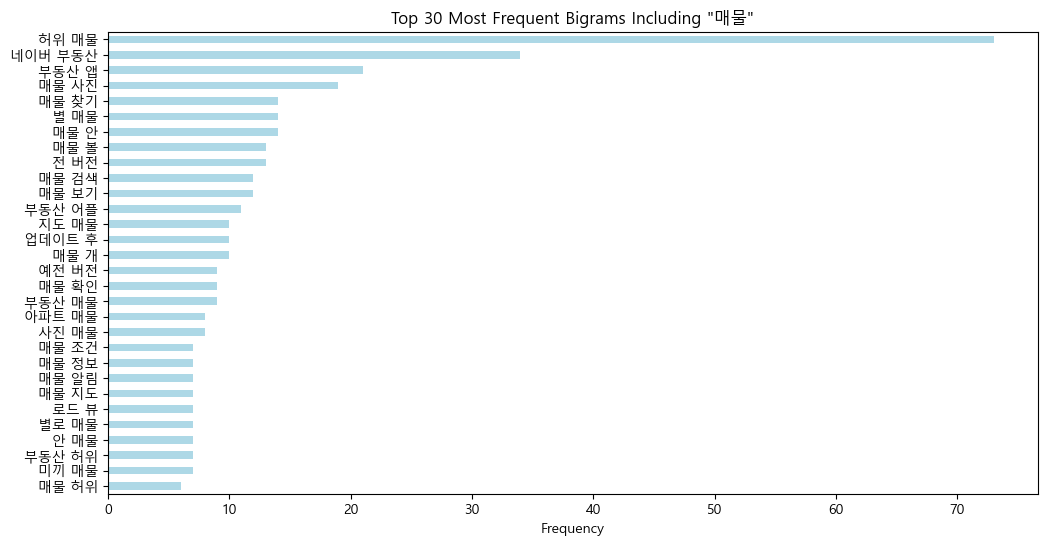

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 데이터 로드
data_path = 'C:/Users/hp/Downloads/preprocessed2_reviews_data_네이버부동산_별점.csv'
df = pd.read_csv(data_path)

# '매물'을 포함하는 리뷰 필터링
df_with_maemul = df[df['nouns_without_stopwords'].str.contains('매물', na=False)]

# 투그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 'nouns_without_stopwords' 열의 각 리뷰를 공백으로 연결하여 하나의 문자열로 만듦
documents = [' '.join(eval(noun_list)) for noun_list in df_with_maemul['nouns_without_stopwords'] if not pd.isna(noun_list)]

# 투그램 빈도수 계산
X = vectorizer.fit_transform(documents)
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_sums = bigram_counts.sum().sort_values(ascending=False)

# 상위 30개 투그램 시각화
top_30_bigrams = bigram_sums.head(30)
plt.figure(figsize=(12, 6))
top_30_bigrams.sort_values(ascending=False).plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams Including "매물"')
plt.gca().invert_yaxis()  # 상위 순으로 보이도록 y축 반전
plt.show()


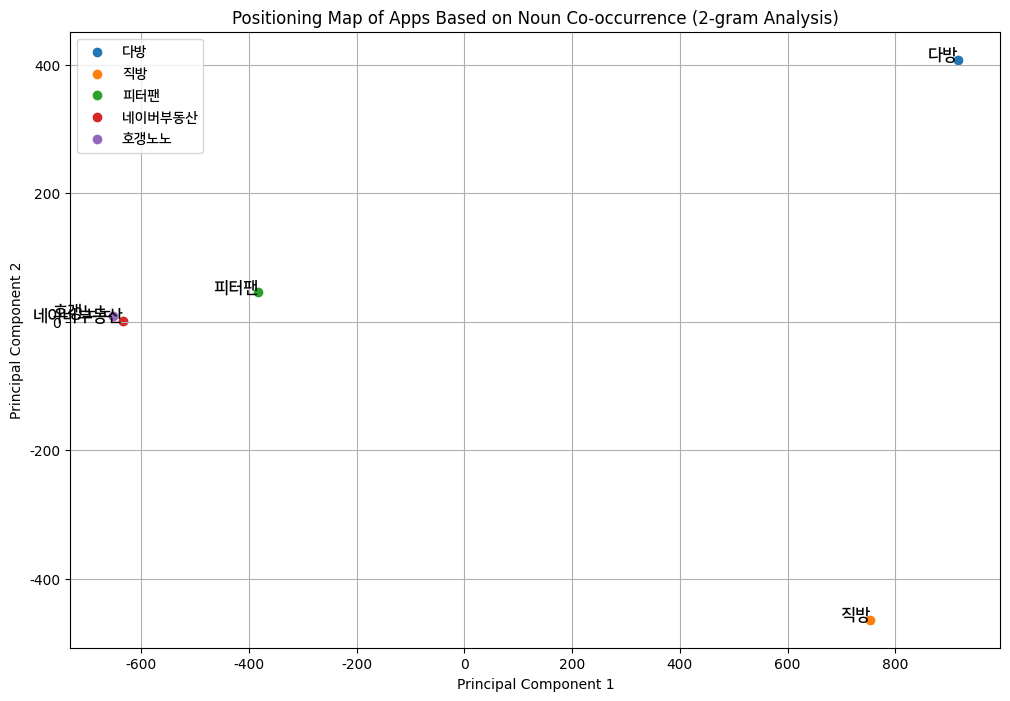

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 파일 경로 리스트
file_paths = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]


# 데이터 로드 및 전처리
app_names = ['다방', '직방', '피터팬', '네이버부동산', '호갱노노']
documents_per_app = {}

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    nouns = df['nouns_without_stopwords'].dropna().tolist()
    # 리스트가 문자열로 되어 있으면, 리스트로 변환
    all_nouns = [noun for sublist in nouns for noun in eval(sublist)]
    # 명사를 공백으로 연결하여 문자열로 변환
    documents_per_app[app_names[i]] = ' '.join(all_nouns)

# 2-그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 문서 벡터화
X = vectorizer.fit_transform(documents_per_app.values())
word_list = vectorizer.get_feature_names_out()

# PCA로 차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# 결과 시각화
plt.figure(figsize=(12, 8))
for i, app_name in enumerate(app_names):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], label=app_name)
    plt.text(X_reduced[i, 0], X_reduced[i, 1], app_name, fontsize=12, ha='right', fontproperties=font_prop)

plt.title('Positioning Map of Apps Based on Noun Co-occurrence (2-gram Analysis)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(prop=font_prop)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


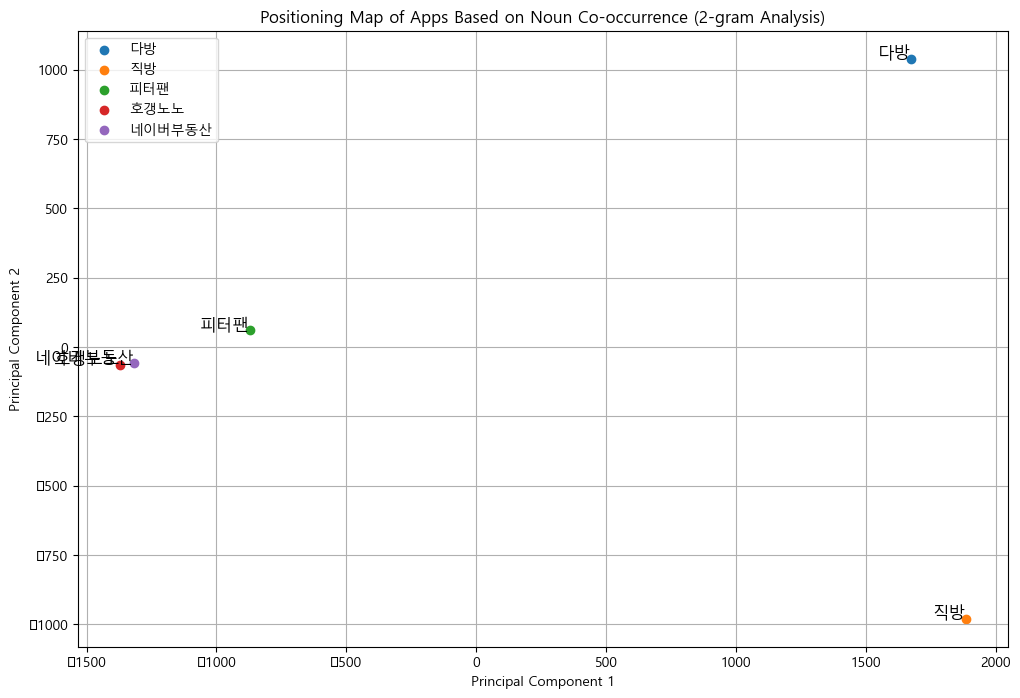

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 파일 경로 리스트
file_paths = [
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_다방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_직방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_피터팬_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_호갱노노_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_네이버부동산_별점.csv'
]

# 데이터 로드 및 전처리
app_names = ['다방', '직방', '피터팬', '호갱노노', '네이버부동산']
documents_per_app = {}

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    nouns = df['nouns_without_stopwords'].dropna().tolist()
    # 리스트가 문자열로 되어 있으면, 리스트로 변환
    all_nouns = [noun for sublist in nouns for noun in eval(sublist)]
    # 명사를 공백으로 연결하여 문자열로 변환
    documents_per_app[app_names[i]] = ' '.join(all_nouns)

# 2-그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 문서 벡터화
X = vectorizer.fit_transform(documents_per_app.values())
word_list = vectorizer.get_feature_names_out()

# PCA로 차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# 결과 시각화
plt.figure(figsize=(12, 8))
for i, app_name in enumerate(app_names):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], label=app_name)
    plt.text(X_reduced[i, 0], X_reduced[i, 1], app_name, fontsize=12, ha='right')

plt.title('Positioning Map of Apps Based on Noun Co-occurrence (2-gram Analysis)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


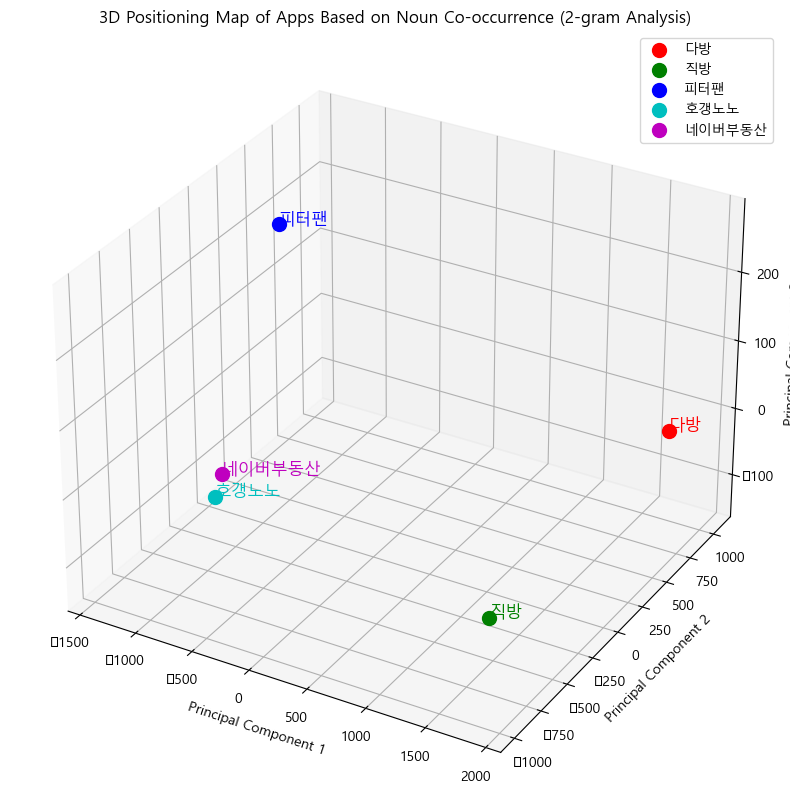

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우 환경에서 맑은 고딕 폰트 경로
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 파일 경로 리스트
file_paths = [
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_다방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_직방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_피터팬_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_호갱노노_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_네이버부동산_별점.csv'
]

# 데이터 로드 및 전처리
app_names = ['다방', '직방', '피터팬', '호갱노노', '네이버부동산']
documents_per_app = {}

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    nouns = df['nouns_without_stopwords'].dropna().tolist()
    # 리스트가 문자열로 되어 있으면, 리스트로 변환
    all_nouns = [noun for sublist in nouns for noun in eval(sublist)]
    # 명사를 공백으로 연결하여 문자열로 변환
    documents_per_app[app_names[i]] = ' '.join(all_nouns)

# 2-그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 문서 벡터화
X = vectorizer.fit_transform(documents_per_app.values())
word_list = vectorizer.get_feature_names_out()

# PCA로 차원 축소 (3차원)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.toarray())

# 3D 시각화
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 각 앱의 좌표 표시
colors = ['r', 'g', 'b', 'c', 'm']
for i, app_name in enumerate(app_names):
    ax.scatter(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], color=colors[i], s=100, label=app_name)
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], app_name, fontsize=12, color=colors[i])

# 축 레이블 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Positioning Map of Apps Based on Noun Co-occurrence (2-gram Analysis)')

# 격자 및 범례 추가
ax.grid(True)
ax.legend()

plt.show()


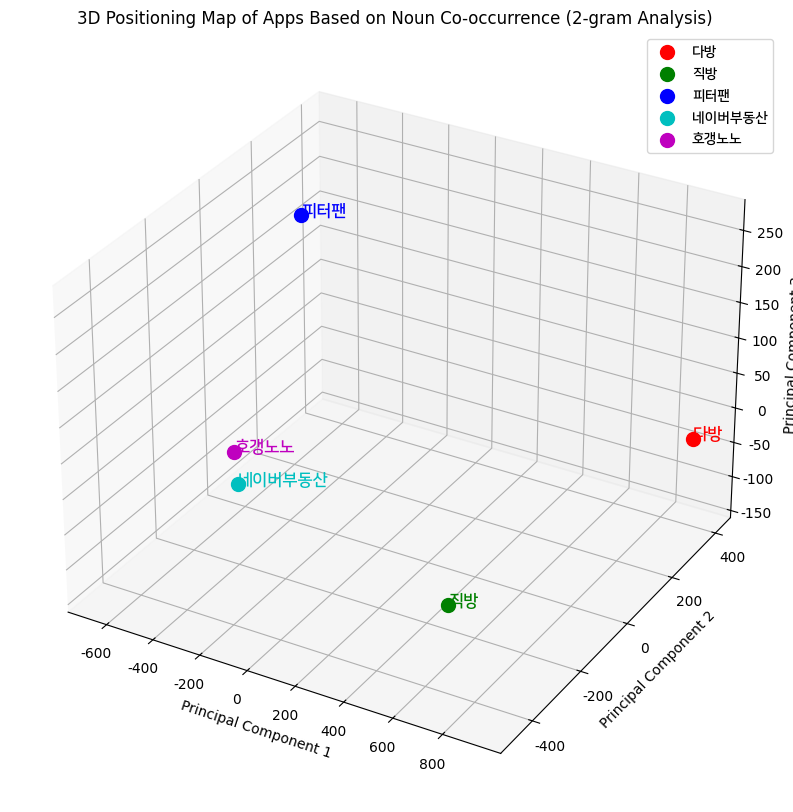

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 파일 경로 리스트

# 파일 경로 리스트
file_paths = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]

# 데이터 로드 및 전처리
app_names = ['다방', '직방', '피터팬', '네이버부동산', '호갱노노']
documents_per_app = {}

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    nouns = df['nouns_without_stopwords'].dropna().tolist()
    # 리스트가 문자열로 되어 있으면, 리스트로 변환
    all_nouns = [noun for sublist in nouns for noun in eval(sublist)]
    # 명사를 공백으로 연결하여 문자열로 변환
    documents_per_app[app_names[i]] = ' '.join(all_nouns)

# 2-그램 생성기 설정
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')

# 문서 벡터화
X = vectorizer.fit_transform(documents_per_app.values())
word_list = vectorizer.get_feature_names_out()

# PCA로 차원 축소 (3차원)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.toarray())

# 3D 시각화
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 각 앱의 좌표 표시
colors = ['r', 'g', 'b', 'c', 'm']
for i, app_name in enumerate(app_names):
    ax.scatter(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], color=colors[i], s=100, label=app_name)
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], app_name, fontsize=12, color=colors[i], fontproperties=font_prop)

# 축 레이블 및 제목 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Positioning Map of Apps Based on Noun Co-occurrence (2-gram Analysis)')

# 격자 및 범례 추가
ax.grid(True)
ax.legend(prop=font_prop)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import itertools
from IPython.display import display

# 파일 경로 리스트
file_paths = [
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_다방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_직방_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_피터팬_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_호갱노노_별점.csv',
    'C:/Users/hp/Downloads/preprocessed2_reviews_data_네이버부동산_별점.csv'
]

# 앱 이름 목록
app_names = ['다방', '직방', '피터팬', '호갱노노', '네이버부동산']

# 데이터 로드 및 전처리
documents_per_app = {}

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    nouns = df['nouns_without_stopwords'].dropna().tolist()
    all_nouns = [noun for sublist in nouns for noun in eval(sublist)]
    documents_per_app[app_names[i]] = ' '.join(all_nouns)

# 데이터프레임 생성
brand_texts = pd.DataFrame({
    'Brand': app_names,
    'Content': [documents_per_app[app] for app in app_names]
})

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(brand_texts['Content'])

# 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 유사도 점수 생성
brands = brand_texts['Brand'].tolist()
similarity_scores = []

for i, j in itertools.combinations(range(len(brands)), 2):
    similarity_scores.append({
        "Brand 1": brands[i],
        "Brand 2": brands[j],
        "Similarity Score": round(cosine_sim[i, j], 3)
    })

# 데이터프레임으로 변환 및 정렬
similarity_df = pd.DataFrame(similarity_scores).sort_values(by="Similarity Score", ascending=False).reset_index(drop=True)

# 결과 출력
display(similarity_df)


,Brand 1,Brand 2,Similarity Score
0,다방,피터팬,0.805
1,다방,직방,0.745
2,직방,피터팬,0.704
3,피터팬,네이버부동산,0.601
4,다방,네이버부동산,0.599
5,직방,네이버부동산,0.580
6,호갱노노,네이버부동산,0.555
7,피터팬,호갱노노,0.490
8,직방,호갱노노,0.465
9,다방,호갱노노,0.449


In [ ]:
포지셔닝 맵에서 네이버부동산과 호갱노노가 가장 가까운 이유는 해당 앱들 간의 리뷰에 자주 나타나는 특정 단어들이 비슷하거나 공통된 경우일 수 있습니다. 예를 들어, 네이버부동산과 호갱노노의 리뷰에서 같은 단어(예: "매물", "아파트", "거래", "정보" 등)가 많이 등장할 수 있습니다. 이런 공통된 단어들이 포지셔닝 맵의 거리 계산에 영향을 미쳐 앱들 간 거리가 가까워지게 됩니다.

반면, TF-IDF 유사도 분석은 각 앱의 리뷰에서 어떤 단어가 중요한지 더 세밀하게 반영하기 때문에, 특정 단어의 빈도나 중요도에 따라 유사도 결과가 달라질 수 있습니다. 예를 들어, 네이버부동산 리뷰에 "아파트"라는 단어가 많고, 다른 앱들에서는 "매물"이 더 많이 등장하는 경우, 네이버부동산과 다른 앱들 간의 유사도가 낮게 평가될 수 있습니다.